# Problem Statement

Financial institutions process millions of credit card transactions every day and rely on automated fraud detection systems to identify potentially fraudulent activity. While these systems are critical for preventing financial losses, they often suffer from a **high false-positive rate**, where legitimate transactions are incorrectly flagged as fraud.

Excessive false-positive alerts create several real-world problems:
- Increased operational costs due to unnecessary manual reviews
- Poor customer experience caused by declined transactions and account freezes
- Reduced trust in automated fraud detection systems

At the same time, fraud detection presents a significant technical challenge due to:
- **Extreme class imbalance**, where fraudulent transactions represent less than 0.2% of all transactions
- **Anonymized features** resulting from PCA transformation, limiting feature interpretability
- The need for **evaluation metrics beyond accuracy**, as traditional accuracy is misleading in highly imbalanced datasets

---

## Objective

The objective of this project is to design a **data-driven fraud detection pipeline** that:

1. Analyzes anonymized transaction data generated through PCA transformation  
2. Properly handles class imbalance using appropriate evaluation metrics  
3. Reduces the number of false-positive fraud alerts while maintaining strong fraud detection capability  
4. Provides measurable and interpretable performance improvements relevant to real-world banking operations

---

## Business Goal

From a banking perspective, the goal is to **optimize fraud alert precision** by reducing unnecessary alerts without compromising security. Achieving this balance helps banks:

- Lower manual investigation costs  
- Improve customer satisfaction  
- Increase confidence in automated fraud detection systems  

This project simulates a real-world banking analytics scenario and demonstrates how data analytics and machine learning techniques can be applied to support operational decision-making in financial institutions.


**Importing all necessary libraries**

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Dataset Description

This project uses a publicly available credit card transaction dataset containing transactions made by European cardholders over a period of two days in September 2013.

---

## Dataset Overview

- **Total transactions:** 284,807  
- **Fraudulent transactions:** 492  
- **Fraud rate:** 0.172%  
- **Data type:** Numerical features only  

The dataset is highly imbalanced, which reflects real-world banking environments where fraudulent activity is rare but costly.

---

## Feature Description

The dataset contains the following variables:

- **V1 – V28:**  
  Anonymized features obtained through **Principal Component Analysis (PCA)**.  
  These features represent linear combinations of the original transaction attributes and are used to protect sensitive customer and transactional information.

- **Time:**  
  Number of seconds elapsed between each transaction and the first transaction in the dataset.  
  This feature captures temporal transaction patterns.

- **Amount:**  
  Transaction amount in monetary units.  
  This feature is particularly important for assessing financial risk and cost-sensitive decisions.

- **Class (Target Variable):**  
  - `1` → Fraudulent transaction  
  - `0` → Legitimate transaction

---

## Data Privacy Considerations

Due to confidentiality and privacy constraints, the original transaction features are not available. The use of PCA-transformed variables ensures that:

- Sensitive customer information is protected  
- Feature interpretability is limited, requiring careful statistical treatment  
- Data preprocessing decisions must preserve distributional properties  

This mirrors real-world banking scenarios where analysts often work with anonymized or transformed data.

---

## Implications for Modeling

The characteristics of this dataset introduce several challenges:

- Traditional accuracy metrics are misleading due to extreme class imbalance  
- Feature-level interpretability is limited because PCA components lack direct semantic meaning  
- Robust preprocessing and appropriate evaluation metrics are critical for reliable model performance  

These constraints directly influence the modeling and evaluation strategies used in this project.


## An extract of the dataset is shown below, with information about each column heading.

In [31]:
df = pd.read_csv('../data/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
df.shape

(284807, 31)

There are 284807 rows and 31 columns.

In [33]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

This gives the information about null/non-null columns with their respective datatypes.

# Data Cleaning and Preprocessing Strategy

Effective fraud detection depends heavily on high-quality data preprocessing, especially when working with anonymized and PCA-transformed features. This section outlines the data cleaning and preprocessing decisions applied in this project and the rationale behind each choice.


In [34]:
# Check missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that there are no null or missing values in the dataset.

## Handling Missing Values: Strategy Overview

If missing values were present in the dataset, the following steps would be taken:

1. **Assess Missingness**
    - Calculate the number and percentage of missing values per column to prioritize which features need attention.

2. **Imputation Strategy**
    - For **numeric columns** (especially those that are skewed or have outliers), use the **median** for imputation, as it is robust to outliers.
    - For numeric columns that are approximately symmetric, the **mean** can be used.
    - For **categorical columns**, use the **mode** (most frequent value).
    - If a column has a very high percentage of missing values (e.g., >30–50%), consider dropping it or using advanced imputation methods after careful analysis.

3. **Implementation Options**
    - Impute missing values **column by column** using pandas methods for explicit control.
    - Alternatively, use `SimpleImputer` from scikit-learn with the strategy set to `'median'` for numeric columns and `'most_frequent'` for categorical columns. This is preferred for reproducibility and integration into machine learning pipelines.



Now let us check the class distribution first for the fraud and legitimate cases.

In [37]:
df['Class'].value_counts()  # 0: Legitimate, 1: Fraudulent

Class
0    284315
1       492
Name: count, dtype: int64

If we want to see it in the percentage form with a pie chart.

Class
0    99.827251
1     0.172749
dtype: float64


<Axes: >

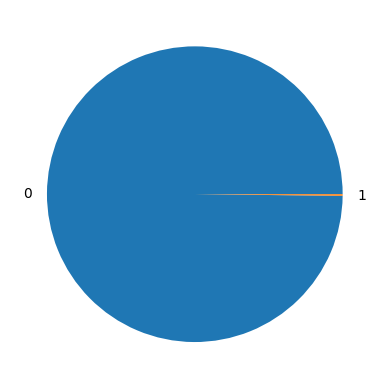

In [ ]:
print(df.groupby('Class').size()/len(df) * 100)  # Class distribution percentages
(df.groupby('Class').size()/len(df) * 100).plot.pie()

After this, we would check the correlation of the columns. 

In [43]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


We can see it is difficult to understand so we visualize a heatmap.

Text(0.5, 1.0, 'Correlation Matrix')

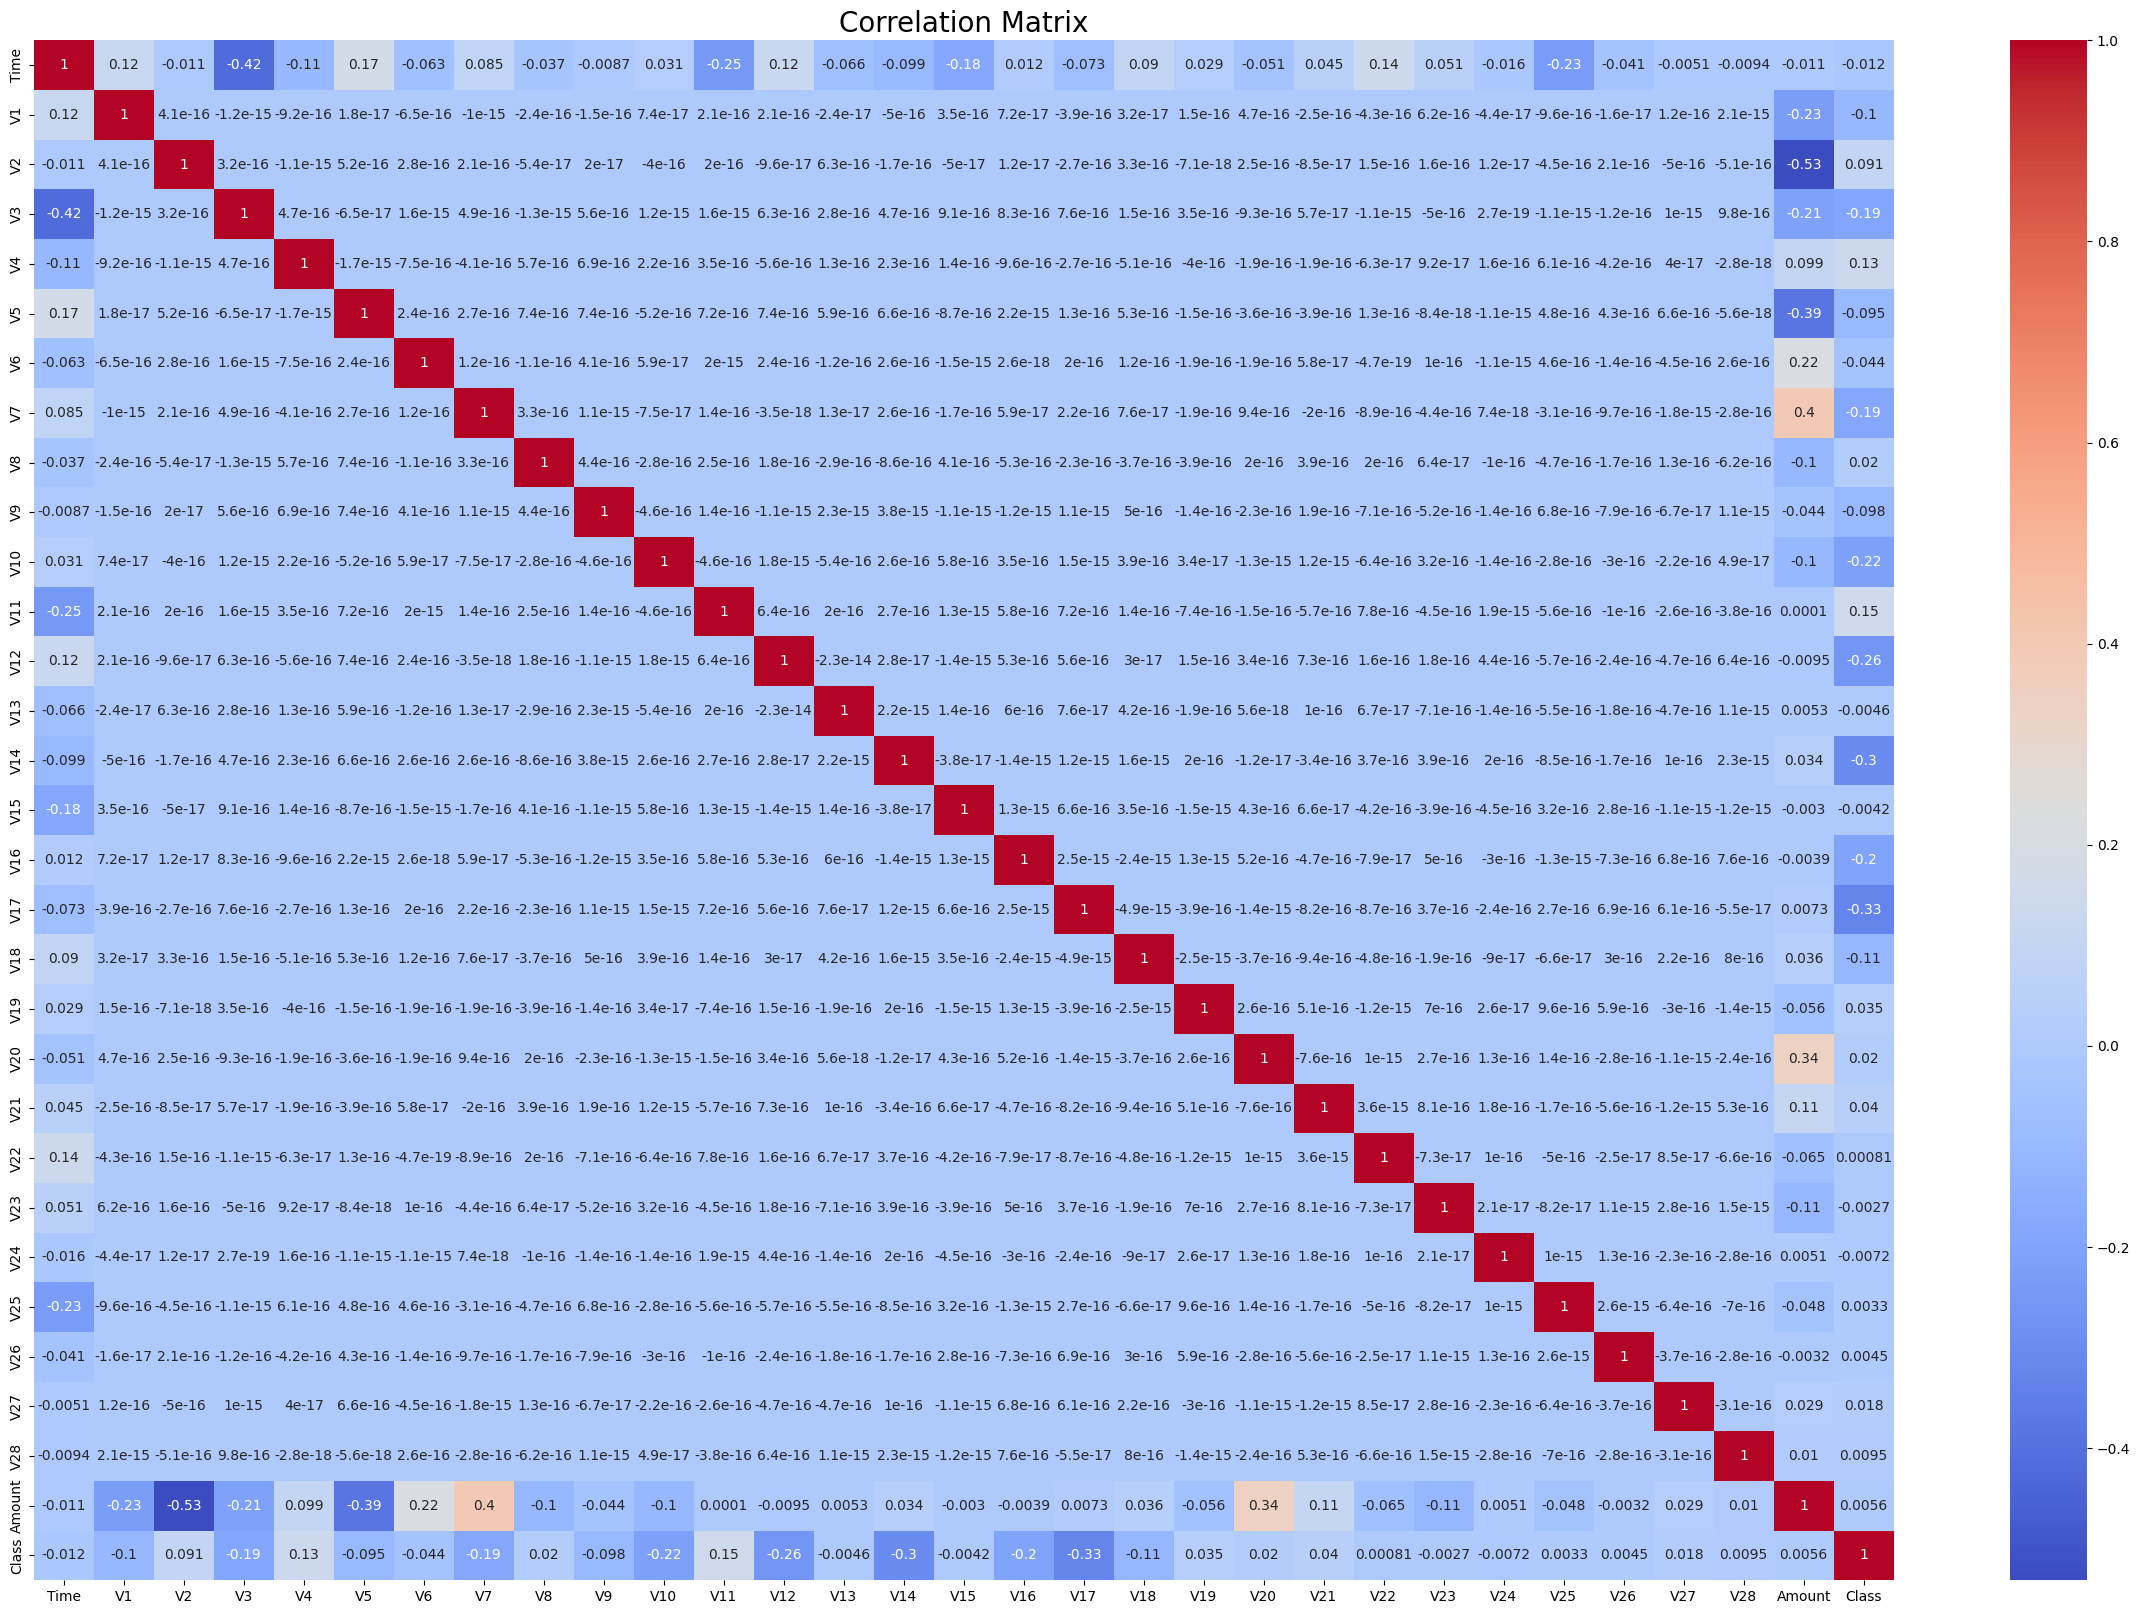

In [44]:
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize=20)    

In [ ]:
# Show the most positively and negatively correlated feature pairs (excluding self-correlation)
corr_pairs = corr.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
# Sort by absolute correlation
sorted_pairs = corr_pairs.reindex(corr_pairs.abs().sort_values(ascending=False).index)
print(sorted_pairs)   
print("Top 5 most positively correlated pairs:")
print(sorted_pairs.head(5))
print("\nTop 5 most negatively correlated pairs:")
print(sorted_pairs.tail(5))

Time   V1        0.117396
       V2       -0.010593
       V3       -0.419618
       V4       -0.105260
       V5        0.173072
                   ...   
Class  V25       0.003308
       V26       0.004455
       V27       0.017580
       V28       0.009536
       Amount    0.005632
Length: 930, dtype: float64
Top 5 most positively correlated pairs:
Time  V1    0.117396
      V2   -0.010593
      V3   -0.419618
      V4   -0.105260
      V5    0.173072
dtype: float64

Top 5 most negatively correlated pairs:
Class  V25       0.003308
       V26       0.004455
       V27       0.017580
       V28       0.009536
       Amount    0.005632
dtype: float64
